# Rafi Fadhlillah
# 121450143
# Deep Learning RC

## No 1

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

- Unduh data kemudian upload ke dalam lembar kerja colab.
- Import data menggunakan pandas.


In [2]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


- Tentukan fitur dan target/label.

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

- Bagi data latih dan data uji menggunakan train_test_split.
-  [10] Bagi data latih dan data uji menjadi 70:30

In [4]:
df_train, df_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

- Bangun model klasifikasi.
- Lakukan pelatihan dan pengujian model serta hitung akurasinya.


- [10] Layer pertama dan kedua menggunakan 10 neuron, kemudian layer selanjutnya menggunakan 15 neuron.
 - [10] Dropout pada layer 1,2,3
-  [10] Gunakan fungsi aktivasi ReLu pada semua layer kecuali pada output yang menggunakan Sigmoid.


[10] Model menggunakan 5 hidden layer


## model 1

In [11]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(df_train, y_train, epochs=200, batch_size=32, validation_data=(df_test, y_test))

Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (None, 11)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 11), dtype=float32)
  • training=True
  • mask=None

## Model 2

In [13]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(df_train, y_train, epochs=200, batch_size=32, validation_data=(df_test, y_test))

Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_20" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (None, 11)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 11), dtype=float32)
  • training=True
  • mask=None

# No 2 CNN dan Modern CNN


In [15]:
# Import library yang diperlukan
#import numpy as np
#import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
#from sklearn import Convolutional
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#import matplotlib.pyplot as plt                       #contoh
from tensorflow.keras.models import Sequential
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Urutkan langkah-langkah berikut sehingga membentuk alur yang logis untuk membangun dan melatih model CNN  menggunakan dataset MNIST (10 poin):


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


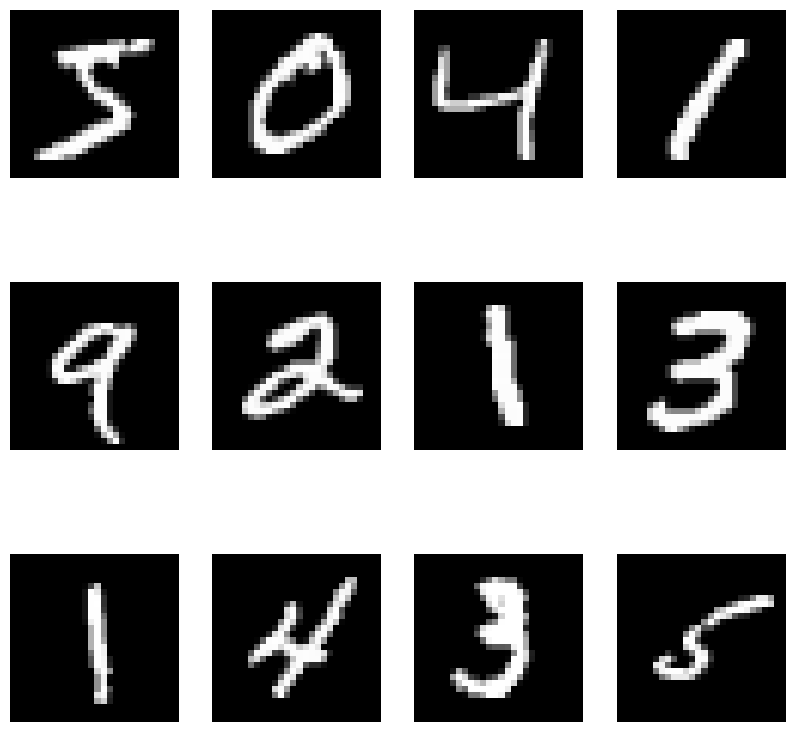

In [16]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess dataset (Normalize,reshape,dan encoding untuk label)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Tampilkan 12 sampel gambar dari dataset MNIST
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt
    plt.axis('off')
plt.show()

In [17]:
# Definisikan model CNN
# Definisikan model LeNet
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    return tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(6, 5, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(16, 5, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

# Train the model
model = LeNet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Initialize and compile the model
model = LeNet()
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8483 - loss: 0.5126 - val_accuracy: 0.9799 - val_loss: 0.0651
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0743 - val_accuracy: 0.9838 - val_loss: 0.0549
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9862 - val_loss: 0.0446
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9890 - val_loss: 0.0358
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9884 - val_loss: 0.0368
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9889 - val_loss: 0.0377
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0233 - val_accuracy: 0.9903 - val_loss: 0.0341
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0

In [18]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1186 - loss: 2.2990
Test accuracy: 0.1298000067472458


In [23]:
# Tampilkan Plot
# Plot Akurasi dan Validasi Akurasi
# Plot Loss dan Validasi Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

AttributeError: 'NoneType' object has no attribute 'history'

- Buat model baru dengan memodifikasi model LeNet , pilih  4 dari opsi berikut (20 poin):
- Jumlah filter pada lapisan konvolusi (Conv2D).
- Ukuran kernel pada lapisan konvolusi.
- Padding pada lapisan konvolusi (valid/same).
- Tambahkan Stride
- Fungsi aktivasi di lapisan konvolusi dan fully connected (ReLU, Tanh, dll.).
- Ukuran pooling (window size).
- Jenis pooling (MaxPooling atau AveragePooling).
- Jumlah neuron pada lapisan fully connected (Dense).
- Penambahan Dropout.


In [25]:
# Definisikan model LeNet
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    return tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(6, 5, activation='sigmoid', strides=(1,1)),
        layers.MaxPooling2D(2),
        layers.Conv2D(16, 5, activation='sigmoid', strides=(1,1)),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(512, activation='softmax'),
        layers.Dense(128, activation='softmax'),
        layers.Dense(num_classes, activation='softmax')
    ])

# Train the model
model = LeNet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Initialize and compile the model
model = LeNet()
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1185 - loss: 2.2952 - val_accuracy: 0.3815 - val_loss: 2.0428
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3864 - loss: 1.8412 - val_accuracy: 0.4016 - val_loss: 1.3978
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4244 - loss: 1.3759 - val_accuracy: 0.4892 - val_loss: 1.1253
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4931 - loss: 1.1012 - val_accuracy: 0.5056 - val_loss: 0.9620
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5133 - loss: 0.9885 - val_accuracy: 0.5988 - val_loss: 0.8987
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6094 - loss: 0.8899 - val_accuracy: 0.6451 - val_loss: 0.7668
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6531 - loss: 0.7750 - val_accuracy: 0.7270 - val_loss: 0.6823
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7434 - loss: 0.6832 - val_accuracy: 0

In [26]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,110 (785.59 KB)

 Trainable params: 201,110 (785.59 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0924 - loss: 2.3026
Test accuracy: 0.09799999743700027


### Tugas Analisis (30 poin)
- Analisis perbandingan nilai evaluasi dari model LeNet dan modifikasi model LeNet !
- Jelaskan alasan 4 opsi yang anda pilih dinomor 4 untuk membangun model  LeNet baru dan bagaimana parameter tersebut mempengaruhi nilai evaluasi !
- Dari nilai evaluasi klasifikasi per kelas dengan melakukan pengujian 10 gambar baru, mana yang lebih baik dari dari kedua model tersebut dengan membandingkan selisih akurasinya dari nilai test akurasi masing-masing model.

</br>
saya menambahkan stride(1,1), mengganti fungsi aktivasi, menambah jumlah neuron dalam dense dan menambahkan droput. Setelah dimodifikasi akurasi malah menurun hal ini mungkin saja akibat dari penambahan stride yang berpengaruh pada input size yang kurang cocok dengan LeNet walaupun ditambahkan neuron yang lebih banyak tetap saja menurun dari 11 persen menjadi 9 persen dapat dilihat juga bahwa penambahan droput masih tidak berpengaruh untuk hasil model yang overfitting diatas karena akurasi train nya sangat tinggi ketika test malah kurang baik


# No 3 LSTM dan GRU

Pilih tujuh saja library yang akan anda gunakan untuk menyelesaikan code dan beri tagar (#) untuk libary yang tidak perlu (10 poin).


In [28]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
data = pd.read_csv('/content/BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [30]:
data1 = data.filter(['Close'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [31]:
# Convert the dataframe to a numpy array
dataset = data1.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [32]:
# Split the data into training set  80% and test set 20%
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [34]:
# Define the lookback period and split into samples
lookback = 60
x_train, y_train = [], []


for i in range(lookback, len(scaled_data)):
    x_train.append(scaled_data[i-lookback:i, 0])
    y_train.append(scaled_data[i, 0])


# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to 3-D so it's suitable for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Menambahkan dense neuron dan menambahkan jumlah epochs menjadi 20

In [42]:
# Build / Define the modified LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0084
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0012
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0012
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5667e-04
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.9802e-04
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.0450e-04
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss:

In [43]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          35,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 701,987 (2.68 MB)

 Trainable params: 233,995 (914.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 467,992 (1.79 MB)

In [40]:
# Get the model's predicted price values
train_predict = model.predict(x_train)

# Evaluate model
test_loss = model.evaluate(x_train, y_train)
print('Test loss:', test_loss)
# Calculate RMSE, MAE, MAPE
rmse = np.sqrt(np.mean((train_predict - y_train)**2))
mae = np.mean(np.abs(train_predict - y_train))
mae

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1288e-04
Test loss: 0.0003393218794371933


0.24464759640840486

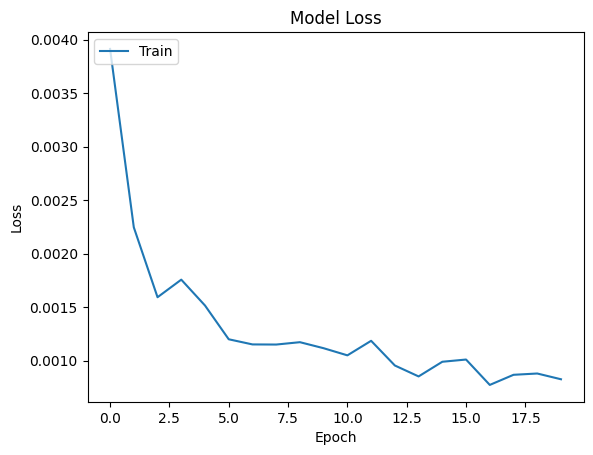

In [44]:
# visualisasi
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

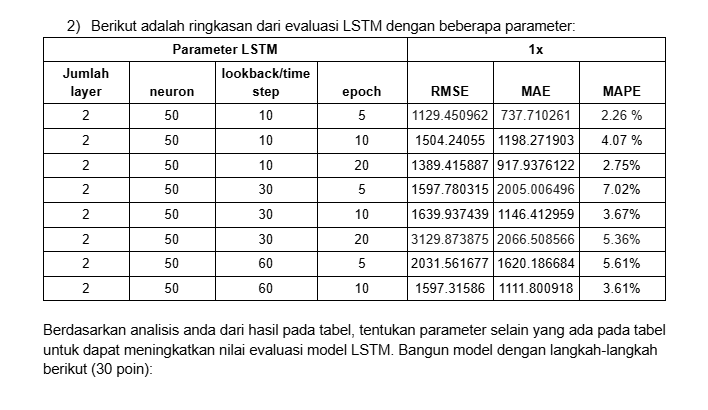![image.png](
  
)